<h1 style="font-size:3rem;color:orange;">WIA 1006: Lab Work 2</h1>

## Wine Classification Using Neural Network Model

Name: Wong Xin Jie<br>
Matrix No: 22053109/1<br>
Occurence: OCC2

###

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###

### Data Preparation

##### Here, we import the datasets and have a brief overview about them

In [2]:
# white wine dataset

whiteWine = pd.read_csv('C:\\Users\\xinji\\OneDrive\\Documents\\winequality-white.csv')
whiteWine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [3]:
# format the dataset into tables

whiteWine = pd.read_csv('C:\\Users\\xinji\\OneDrive\\Documents\\winequality-white.csv', delimiter=';')
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# repeat the same steps for red wine dataset

redWine = pd.read_csv('C:\\Users\\xinji\\OneDrive\\Documents\\winequality-red.csv', delimiter=';')
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# check the information of the white wine dataset

whiteWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### From here, we can see that the white wine dataset contains 12 columns and 4898 rows

In [6]:
# check the information of the red wine dataset

redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### From here, we can see that the red wine dataset contains 12 columns and 1599 rows

In [7]:
whiteWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
redWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Now, we check if the two datasets contain any missing values

In [9]:
# check for null values in the white wine dataset

whiteWine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# check for null values in the red wine dataset

redWine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### From the result above, we can see that there is no missing values in both datasets

In [11]:
# add a target variable, type, to both datasets
# for white wine, it will be represented with value 0 and red wine will be represented with value 1

whiteWine['type'] = 0
redWine['type'] = 1

In [12]:
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [13]:
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
# combine both datasets into a single dataset

combinedWine = pd.concat([whiteWine, redWine])
combinedWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [15]:
# split the data into training set, validation set and test set

from sklearn.model_selection import train_test_split

x = combinedWine.drop(['type'], axis=1)
y = combinedWine['type']

# first, we will split the dataset in training and remaining dataset
x_train, x_rem, y_train, y_rem = train_test_split(x, y, train_size=0.8, random_state=100)

# now, we divide the remaining dataset into validation set and test set equally
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5, random_state=100)

In [16]:
# feature scaling

from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train)
x_valid = s_scaler.transform(x_valid)
x_test = s_scaler.transform(x_test)

###

### Model Development

In [17]:
# import libraries for neural network model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

#### Now, we will start creating differnet neural network architectures and then training the models

In [18]:
# Model One (single hidden layer)

modelOne = Sequential()

# input layer with 64 neurons and ReLU activation
modelOne.add(Dense(64, activation='relu', input_shape=(12,)))
# hidden layer with 32 neurons and ReLU activation
modelOne.add(Dense(32, activation='relu')) 
# output layer with 1 neuron for binary classification and signmoid activation
modelOne.add(Dense(1, activation='sigmoid'))

# compile the model
modelOne.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

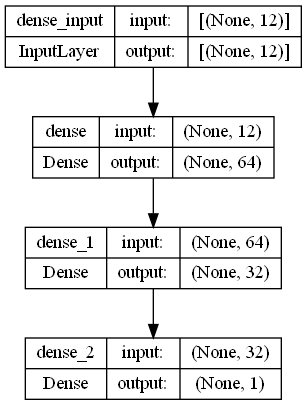

In [19]:
# visualize the model
plot_model(modelOne, to_file='modelOne_architecture.png', show_shapes=True)

In [20]:
# train the model
historyOne = modelOne.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=50)

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.1959 - accuracy: 0.9488 - val_loss: 0.0321 - val_accuracy: 0.9954
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9927 - val_loss: 0.0247 - val_accuracy: 0.9969
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9946 - val_loss: 0.0248 - val_accuracy: 0.9954
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0235 - accuracy: 0.9950 - val_loss: 0.0221 - val_accuracy: 0.9969
Epoch 5/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9960 - val_loss: 0.0212 - val_accuracy: 0.9969
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9963 - val_loss: 0.0209 - val_accuracy: 0.9969
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9967 - val_loss: 0.0202 - val_accuracy: 0.9969
Epoch 

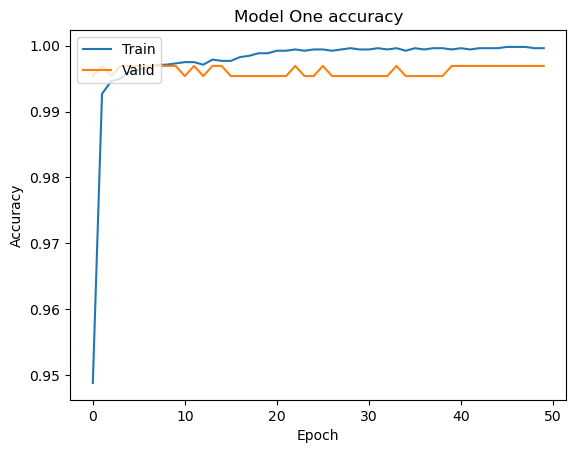

In [21]:
plt.plot(historyOne.history['accuracy'])
plt.plot(historyOne.history['val_accuracy'])
plt.title('Model One accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

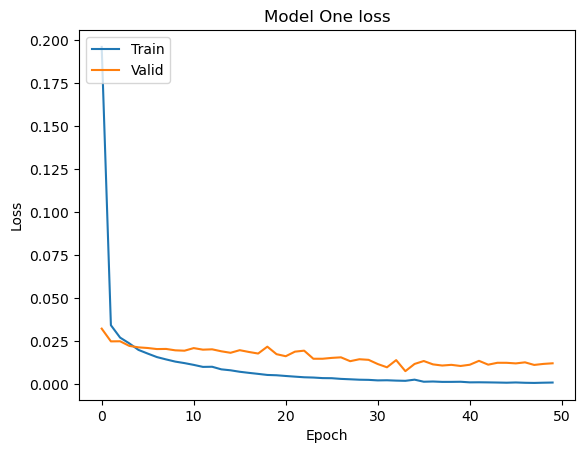

In [22]:
plt.plot(historyOne.history['loss']) 
plt.plot(historyOne.history['val_loss']) 
plt.title('Model One loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [23]:
modelOneloss, modelOneaccuracy = modelOne.evaluate(x_valid, y_valid)

print('(Model One) Validation Loss:', modelOneloss)
print('(Model One) Validation Accuracy:', modelOneaccuracy)

21/21 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9969
(Model One) Validation Loss: 0.011970645748078823
(Model One) Validation Accuracy: 0.9969230890274048


##### From the graphs above, we can see that the curves for both validation loss and accuracy are inconsistent. However, the accuracy of the model still remained high.

#####

In [24]:
# Model Two (2 hidden layer)

modelTwo = Sequential()

# input layer with 64 neurons and ReLU activation
modelTwo.add(Dense(64, activation='relu', input_shape=(12,)))
# hidden layers
modelTwo.add(Dense(32, activation='relu'))
modelTwo.add(Dense(16, activation='relu'))
# output layer with 1 neuron for binary classification and signmoid activation
modelTwo.add(Dense(1, activation='sigmoid'))

# compile the model
modelTwo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

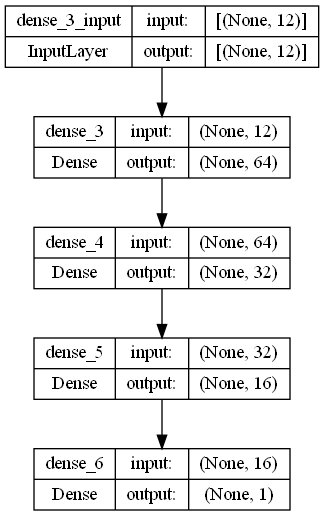

In [25]:
# visualize the model
plot_model(modelTwo, to_file='modelTwo_architecture.png', show_shapes=True)

In [26]:
# train the model
historyTwo = modelTwo.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=50)

Epoch 1/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1627 - accuracy: 0.9646 - val_loss: 0.0243 - val_accuracy: 0.9969
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9938 - val_loss: 0.0210 - val_accuracy: 0.9969
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9960 - val_loss: 0.0225 - val_accuracy: 0.9954
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0202 - accuracy: 0.9960 - val_loss: 0.0224 - val_accuracy: 0.9954
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9967 - val_loss: 0.0225 - val_accuracy: 0.9969
Epoch 6/50
163/163 [==============================] - 1s 5ms/step - loss: 0.0156 - accuracy: 0.9969 - val_loss: 0.0232 - val_accuracy: 0.9954
Epoch 7/50
163/163 [==============================] - 1s 5ms/step - loss: 0.0146 - accuracy: 0.9969 - val_loss: 0.0243 - val_accuracy: 0.9938
Epoch 

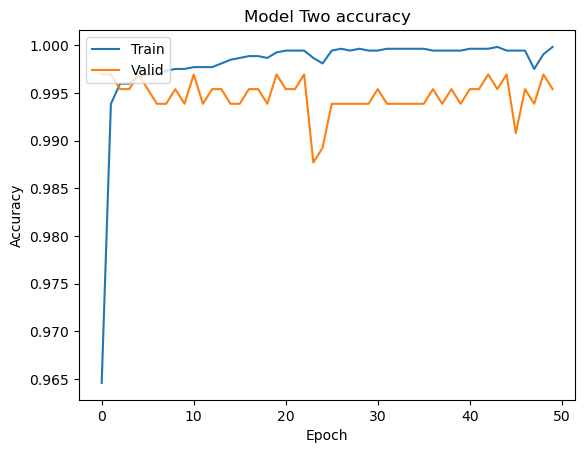

In [27]:
plt.plot(historyTwo.history['accuracy'])
plt.plot(historyTwo.history['val_accuracy'])
plt.title('Model Two accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

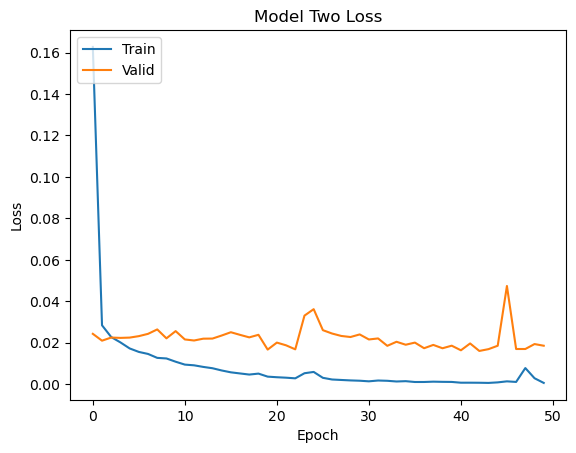

In [28]:
plt.plot(historyTwo.history['loss'])
plt.plot(historyTwo.history['val_loss'])
plt.title('Model Two Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [29]:
modelTwoloss, modelTwoaccuracy = modelTwo.evaluate(x_valid, y_valid)

print('(Model Two) Validation Loss:', modelTwoloss)
print('(Model Two) Validation Accuracy:', modelTwoaccuracy)

21/21 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9954
(Model Two) Validation Loss: 0.018567180261015892
(Model Two) Validation Accuracy: 0.9953846335411072


#####

In [30]:
# Model Three (3 hidden layer)

modelThree = Sequential()

# input layeer with 64 neurons and ReLU activation
modelThree.add(Dense(64, activation='relu', input_shape=(12,)))
# hidden layers
modelThree.add(Dense(32, activation='relu')) 
modelThree.add(Dense(16, activation='relu'))
modelThree.add(Dense(8, activation='relu'))
# output layer with 1 neuron for binary classification and signmoid activation
modelThree.add(Dense(1, activation='sigmoid'))

# compile the model
modelThree.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

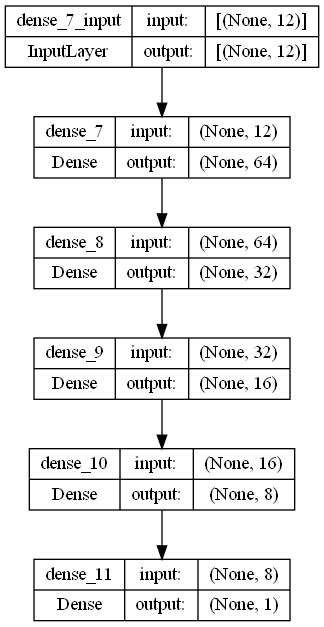

In [31]:
# visualize the model
plot_model(modelThree, to_file='modelThree_architecture.png', show_shapes=True)

In [32]:
# train the model
historyThree = modelThree.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=50)

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.2628 - accuracy: 0.8838 - val_loss: 0.1755 - val_accuracy: 0.9954
Epoch 2/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1706 - accuracy: 0.9925 - val_loss: 0.1576 - val_accuracy: 0.9954
Epoch 3/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1510 - accuracy: 0.9950 - val_loss: 0.1406 - val_accuracy: 0.9954
Epoch 4/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1231 - accuracy: 0.9960 - val_loss: 0.1024 - val_accuracy: 0.9969
Epoch 5/50
163/163 [==============================] - 1s 5ms/step - loss: 0.0775 - accuracy: 0.9965 - val_loss: 0.0646 - val_accuracy: 0.9969
Epoch 6/50
163/163 [==============================] - 1s 5ms/step - loss: 0.0275 - accuracy: 0.9971 - val_loss: 0.0291 - val_accuracy: 0.9923
Epoch 7/50
163/163 [==============================] - 1s 5ms/step - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0228 - val_accuracy: 0.9954
Epoch 

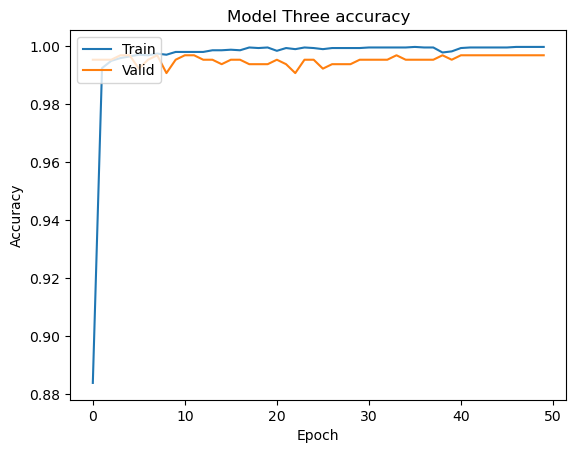

In [33]:
plt.plot(historyThree.history['accuracy'])
plt.plot(historyThree.history['val_accuracy'])
plt.title('Model Three accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

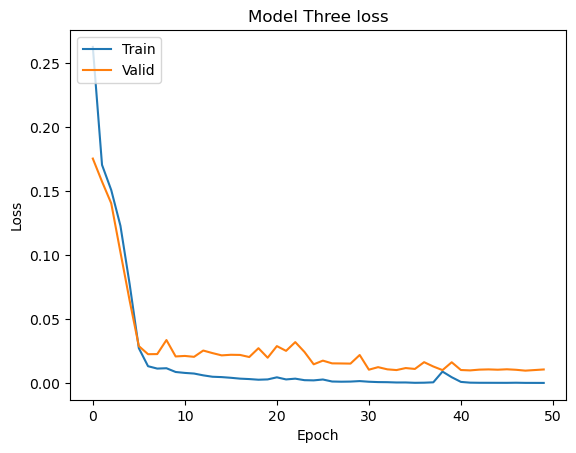

In [34]:
plt.plot(historyThree.history['loss']) 
plt.plot(historyThree.history['val_loss']) 
plt.title('Model Three loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [35]:
modelThreeloss, modelThreeaccuracy = modelThree.evaluate(x_valid, y_valid)

print('(Model Three) Validation Loss:', modelThreeloss)
print('(Model Three) Validation Accuracy:', modelThreeaccuracy)

21/21 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9969
(Model Three) Validation Loss: 0.01082622166723013
(Model Three) Validation Accuracy: 0.9969230890274048


#####

In [36]:
# Model Four (4 hidden layer)

modelFour = Sequential()

# input layer with 128 neurons and ReLU activation
modelFour.add(Dense(128, activation='relu', input_shape=(12,)))
# hidden layers
modelFour.add(Dense(64, activation='relu')) 
modelFour.add(Dense(32, activation='relu'))
modelFour.add(Dense(16, activation='relu'))
modelFour.add(Dense(8, activation='relu'))
# output layer with 1 neuron for binary classification and signmoid activation
modelFour.add(Dense(1, activation='sigmoid'))

# compile the model
modelFour.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

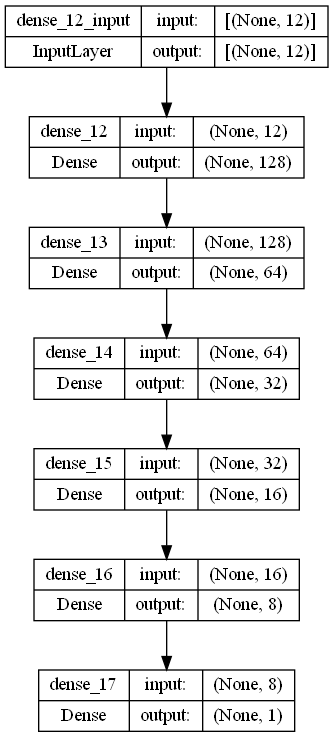

In [37]:
# visualize the model
plot_model(modelFour, to_file='modelFour_architecture.png', show_shapes=True)

In [38]:
# train the model
historyFour = modelFour.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=50)

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.1272 - accuracy: 0.9810 - val_loss: 0.0264 - val_accuracy: 0.9954
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9956 - val_loss: 0.0267 - val_accuracy: 0.9908
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 0.0255 - val_accuracy: 0.9969
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9963 - val_loss: 0.0293 - val_accuracy: 0.9938
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0163 - accuracy: 0.9967 - val_loss: 0.0231 - val_accuracy: 0.9969
Epoch 6/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0239 - val_accuracy: 0.9954
Epoch 7/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0120 - accuracy: 0.9975 - val_loss: 0.0317 - val_accuracy: 0.9923
Epoch 

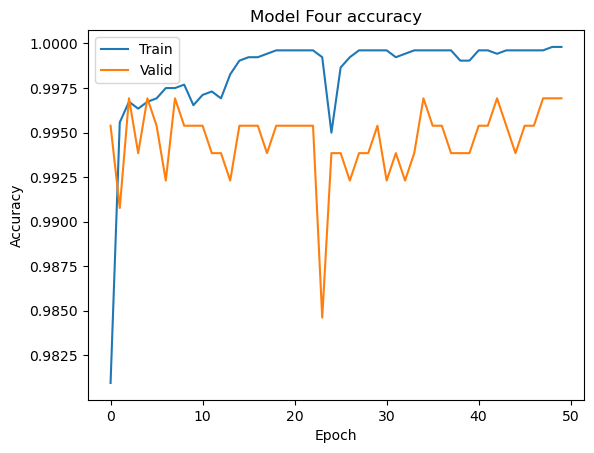

In [39]:
plt.plot(historyFour.history['accuracy'])
plt.plot(historyFour.history['val_accuracy'])
plt.title('Model Four accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

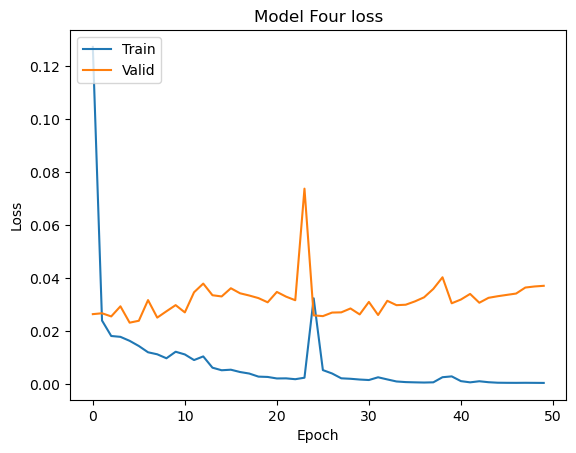

In [40]:
plt.plot(historyFour.history['loss']) 
plt.plot(historyFour.history['val_loss']) 
plt.title('Model Four loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [41]:
modelFourloss, modelFouraccuracy = modelFour.evaluate(x_valid, y_valid)

print('(Model Four) Validation Loss:', modelFourloss)
print('(Model Four) Validation Accuracy:', modelFouraccuracy)

21/21 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9969
(Model Four) Validation Loss: 0.03704962134361267
(Model Four) Validation Accuracy: 0.9969230890274048


#####

In [42]:
# Model Five (5 hidden layer)

modelFive = Sequential()

# input layaer with 64 neurons and ReLU activation
modelFive.add(Dense(128, activation='relu', input_shape=(12,)))
# hidden layers
modelFive.add(Dense(64, activation='relu')) 
modelFive.add(Dense(32, activation='relu'))
modelFive.add(Dense(16, activation='relu'))
modelFive.add(Dense(8, activation='relu'))
modelFive.add(Dense(4, activation='relu'))
# output layer with 1 neuron for binary classification and signmoid activation
modelFive.add(Dense(1, activation='sigmoid'))

# compile the model
modelFive.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

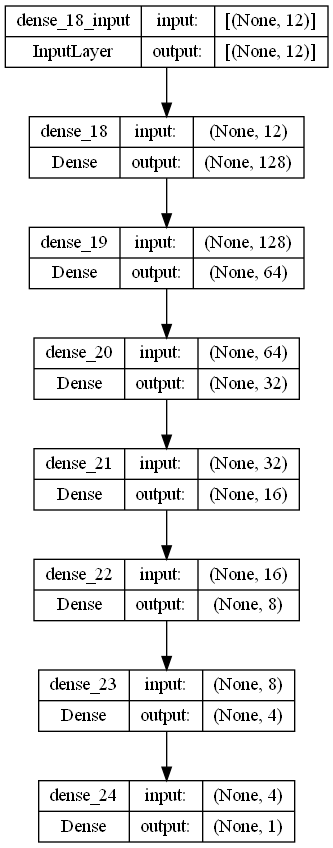

In [43]:
# visualize the model
plot_model(modelFive, to_file='modelFive_architecture.png', show_shapes=True)

In [44]:
# train the model
historyFive = modelFive.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=32, epochs=50)

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.1334 - accuracy: 0.9611 - val_loss: 0.0235 - val_accuracy: 0.9954
Epoch 2/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9940 - val_loss: 0.0381 - val_accuracy: 0.9862
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9963 - val_loss: 0.0202 - val_accuracy: 0.9969
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9954 - val_loss: 0.0226 - val_accuracy: 0.9969
Epoch 5/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0165 - accuracy: 0.9975 - val_loss: 0.0239 - val_accuracy: 0.9954
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9973 - val_loss: 0.0223 - val_accuracy: 0.9969
Epoch 7/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.0234 - val_accuracy: 0.9969
Epoch 

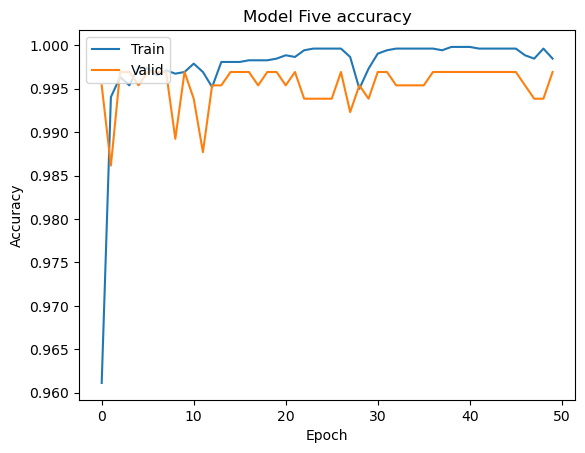

In [45]:
plt.plot(historyFive.history['accuracy'])
plt.plot(historyFive.history['val_accuracy'])
plt.title('Model Five accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

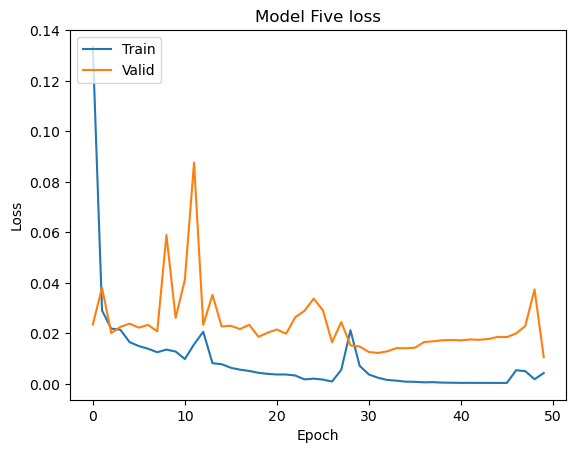

In [46]:
plt.plot(historyFive.history['loss']) 
plt.plot(historyFive.history['val_loss']) 
plt.title('Model Five loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [47]:
modelFiveloss, modelFiveaccuracy = modelFive.evaluate(x_valid, y_valid)

print('(Model Five) Validation Loss:', modelFiveloss)
print('(Model Five) Validation Accuracy:', modelFiveaccuracy)

21/21 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.9969
(Model Five) Validation Loss: 0.010601735673844814
(Model Five) Validation Accuracy: 0.9969230890274048


#####

### Model Tuning

In [48]:
print('Model One Accuracy:   ', modelOneaccuracy)
print('Model Two Accuracy:   ', modelTwoaccuracy)
print('Model Three Accuracy: ', modelThreeaccuracy)
print('Model Four Accuracy:  ', modelFouraccuracy)
print('Model Five Accuracy:  ', modelFiveaccuracy)

Model One Accuracy:    0.9969230890274048
Model Two Accuracy:    0.9953846335411072
Model Three Accuracy:  0.9969230890274048
Model Four Accuracy:   0.9969230890274048
Model Five Accuracy:   0.9969230890274048


##### From the accuracy list above, we can see that Model One, Three, Four and Five have the same, and also highest accuracy. However, a problem that arise in these models is that the accuracy value of each model kept on changing due to random initialization of weights during the optimization process. Hence, other metrics will be used to determine the best model.

In [49]:
# checking precision score for each model

from sklearn.metrics import precision_score


# Model One
y_predOne = modelOne.predict(x_valid)
y_predOne = (y_predOne > 0.5).astype(int) 
precisionOne = precision_score(y_valid, y_predOne)

# Model Two
y_predTwo = modelTwo.predict(x_valid)
y_predTwo = (y_predTwo > 0.5).astype(int) 
precisionTwo = precision_score(y_valid, y_predTwo)

# Model Three
y_predThree = modelThree.predict(x_valid)
y_predThree = (y_predThree > 0.5).astype(int) 
precisionThree = precision_score(y_valid, y_predThree)

# Model Four
y_predFour = modelFour.predict(x_valid)
y_predFour = (y_predFour > 0.5).astype(int) 
precisionFour = precision_score(y_valid, y_predFour)

# Model Five
y_predFive = modelFive.predict(x_valid)
y_predFive = (y_predFive > 0.5).astype(int) 
precisionFive = precision_score(y_valid, y_predFive)

print('Model One Precision:', precisionOne)
print('Model Two Precision:', precisionTwo)
print('Model Three Precision:', precisionThree)
print('Model Four Precision:', precisionFour)
print('Model Five Precision:', precisionFive)

21/21 [==============================] - 0s 3ms/step
Model One Precision: 0.9935483870967742
Model Two Precision: 0.9935064935064936
Model Three Precision: 0.9935483870967742
Model Four Precision: 0.9935483870967742
Model Five Precision: 1.0


##### Again, here we see that Model Five has the highest precision, and also it has a higher complexity due to the greater number of hidden layers and has the potential to capture more intricate relationships in the data. Hence, we will choose Model Five as the best model

##### Now, we will perform hyperparameter tuning by changing the learning rate, batch size, activation function and epochs

In [50]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# define a function that returns the Keras model
def create_model(learning_rate):
    return modelFive

# create a KerasClassifier
model_wrapper = KerasClassifier(build_fn=create_model)

# define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

# perform grid search with cross-validation
grid_search = GridSearchCV(model_wrapper, param_grid, cv=3)
grid_search.fit(x_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# get the best mean cross-validated score
best_score = grid_search.best_score_

# get the results
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_learning_rate', 'param_batch_size', 'param_epochs', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)

C:\Users\xinji\AppData\Local\Temp\ipykernel_20848\4210866364.py:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model)


Epoch 1/10
109/109 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9986
Epoch 2/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9994
Epoch 3/10
109/109 [==============================] - 0s 3ms/step - loss: 7.7968e-04 - accuracy: 0.9997
Epoch 4/10
109/109 [==============================] - 0s 3ms/step - loss: 6.3859e-04 - accuracy: 0.9997
Epoch 5/10
109/109 [==============================] - 0s 4ms/step - loss: 5.9866e-04 - accuracy: 0.9997
Epoch 6/10
109/109 [==============================] - 0s 4ms/step - loss: 5.5794e-04 - accuracy: 0.9997
Epoch 7/10
109/109 [==============================] - 0s 4ms/step - loss: 5.4021e-04 - accuracy: 0.9997
Epoch 8/10
109/109 [==============================] - 0s 4ms/step - loss: 5.2468e-04 - accuracy: 0.9997
Epoch 9/10
109/109 [==============================] - 0s 4ms/step - loss: 4.9382e-04 - accuracy: 0.9997
Epoch 10/10
55/55 [==============================] - 1s 2ms/step - loss:

109/109 [==============================] - 0s 4ms/step - loss: 1.4928e-04 - accuracy: 1.0000
Epoch 5/10
109/109 [==============================] - 0s 4ms/step - loss: 1.2043e-04 - accuracy: 1.0000
Epoch 6/10
109/109 [==============================] - 0s 4ms/step - loss: 9.4611e-05 - accuracy: 1.0000
Epoch 7/10
109/109 [==============================] - 0s 4ms/step - loss: 7.1218e-05 - accuracy: 1.0000
Epoch 8/10
109/109 [==============================] - 1s 5ms/step - loss: 5.2390e-05 - accuracy: 1.0000
Epoch 9/10
109/109 [==============================] - 1s 7ms/step - loss: 3.8516e-05 - accuracy: 1.0000
Epoch 10/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 0.9994
Epoch 1/10
109/109 [==============================] - 1s 6ms/step - loss: 8.9208e-04 - accuracy: 0.9997
Epoch 2/10
109/109 [==============================] - 1s 6ms/step - loss: 2.9926e-04 - accuracy: 0.9997
Epoch 3/10
109/109 [==============================] - 1s 7ms/step - loss: 2.5141

109/109 [==============================] - 0s 4ms/step - loss: 6.4933e-06 - accuracy: 1.0000
Epoch 20/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9994
Epoch 1/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 2/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 3/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0082 - accuracy: 0.9991
Epoch 4/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.9980
Epoch 5/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.9991
Epoch 6/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 7/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 8/20
109/109 [==============================] - 0s 4ms/step - loss: 7.4655e-04 - accuracy: 0.9997
Epoc

109/109 [==============================] - 0s 4ms/step - loss: 4.2450e-04 - accuracy: 0.9997
Epoch 15/20
109/109 [==============================] - 1s 7ms/step - loss: 4.1760e-04 - accuracy: 0.9997
Epoch 16/20
109/109 [==============================] - 1s 7ms/step - loss: 4.2464e-04 - accuracy: 0.9997
Epoch 17/20
109/109 [==============================] - 1s 6ms/step - loss: 4.1915e-04 - accuracy: 0.9997
Epoch 18/20
109/109 [==============================] - 1s 7ms/step - loss: 4.2168e-04 - accuracy: 0.9997
Epoch 19/20
109/109 [==============================] - 1s 7ms/step - loss: 4.2033e-04 - accuracy: 0.9997
Epoch 20/20
55/55 [==============================] - 0s 5ms/step - loss: 7.3342e-05 - accuracy: 1.0000
Epoch 1/20
109/109 [==============================] - 1s 6ms/step - loss: 0.0074 - accuracy: 0.9989
Epoch 2/20
109/109 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 3/20
109/109 [==============================] - 0s 4ms/step - loss: 2.676

55/55 [==============================] - 0s 3ms/step - loss: 3.7304e-06 - accuracy: 1.0000
Epoch 1/30
109/109 [==============================] - 0s 4ms/step - loss: 2.0075e-04 - accuracy: 1.0000
Epoch 2/30
109/109 [==============================] - 0s 3ms/step - loss: 1.9858e-04 - accuracy: 1.0000
Epoch 3/30
109/109 [==============================] - 0s 3ms/step - loss: 1.9728e-04 - accuracy: 1.0000
Epoch 4/30
109/109 [==============================] - 0s 4ms/step - loss: 1.9601e-04 - accuracy: 1.0000
Epoch 5/30
109/109 [==============================] - 0s 3ms/step - loss: 1.9475e-04 - accuracy: 1.0000
Epoch 6/30
109/109 [==============================] - 0s 3ms/step - loss: 1.9351e-04 - accuracy: 1.0000
Epoch 7/30
109/109 [==============================] - 0s 4ms/step - loss: 1.9227e-04 - accuracy: 1.0000
Epoch 8/30
109/109 [==============================] - 0s 3ms/step - loss: 1.9104e-04 - accuracy: 1.0000
Epoch 9/30
109/109 [==============================] - 0s 3ms/step - loss: 1.8

109/109 [==============================] - 0s 4ms/step - loss: 4.0199e-04 - accuracy: 0.9997
Epoch 17/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0182e-04 - accuracy: 0.9997
Epoch 18/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0123e-04 - accuracy: 0.9997
Epoch 19/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0185e-04 - accuracy: 0.9997
Epoch 20/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0159e-04 - accuracy: 0.9997
Epoch 21/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0177e-04 - accuracy: 0.9997
Epoch 22/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0153e-04 - accuracy: 0.9997
Epoch 23/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0107e-04 - accuracy: 0.9997
Epoch 24/30
109/109 [==============================] - 0s 4ms/step - loss: 4.0157e-04 - accuracy: 0.9997
Epoch 25/30
109/109 [==============================] - 0s 4ms/step 

109/109 [==============================] - 1s 7ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 3/30
109/109 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.9991
Epoch 4/30
109/109 [==============================] - 0s 4ms/step - loss: 7.4218e-04 - accuracy: 0.9997
Epoch 5/30
109/109 [==============================] - 0s 4ms/step - loss: 4.8881e-04 - accuracy: 0.9994
Epoch 6/30
109/109 [==============================] - 0s 4ms/step - loss: 4.3151e-04 - accuracy: 0.9997
Epoch 7/30
109/109 [==============================] - 0s 4ms/step - loss: 4.2086e-04 - accuracy: 0.9997
Epoch 8/30
109/109 [==============================] - 0s 4ms/step - loss: 4.1762e-04 - accuracy: 0.9997
Epoch 9/30
109/109 [==============================] - 0s 4ms/step - loss: 4.1553e-04 - accuracy: 0.9997
Epoch 10/30
109/109 [==============================] - 0s 4ms/step - loss: 4.1357e-04 - accuracy: 0.9997
Epoch 11/30
109/109 [==============================] - 1s 5ms/step - loss: 4.1008e

109/109 [==============================] - 1s 5ms/step - loss: 1.2464e-05 - accuracy: 1.0000
Epoch 19/30
109/109 [==============================] - 1s 6ms/step - loss: 1.0723e-05 - accuracy: 1.0000
Epoch 20/30
109/109 [==============================] - 0s 4ms/step - loss: 9.3587e-06 - accuracy: 1.0000
Epoch 21/30
109/109 [==============================] - 0s 4ms/step - loss: 8.1805e-06 - accuracy: 1.0000
Epoch 22/30
109/109 [==============================] - 1s 5ms/step - loss: 7.2458e-06 - accuracy: 1.0000
Epoch 23/30
109/109 [==============================] - 0s 4ms/step - loss: 6.4971e-06 - accuracy: 1.0000
Epoch 24/30
109/109 [==============================] - 0s 4ms/step - loss: 5.7587e-06 - accuracy: 1.0000
Epoch 25/30
109/109 [==============================] - 0s 4ms/step - loss: 5.1652e-06 - accuracy: 1.0000
Epoch 26/30
109/109 [==============================] - 0s 4ms/step - loss: 4.6549e-06 - accuracy: 1.0000
Epoch 27/30
109/109 [==============================] - 0s 4ms/step 

55/55 [==============================] - 0s 7ms/step - loss: 0.0050 - accuracy: 0.9994
Epoch 3/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 4/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 5/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9974
Epoch 6/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 7/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 8/10
55/55 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 9/10
55/55 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9994
Epoch 1/10
55/55 [==============================] - 0s 5ms/step - loss: 0.0091 - accuracy: 0.9994
Epoch 2/10
55/55 [============

55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 11/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 12/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 13/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 14/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 15/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 16/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 17/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 18/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 19/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9997
Epoch 20/20
28/28 [===

55/55 [==============================] - 0s 7ms/step - loss: 4.8249e-04 - accuracy: 0.9994
Epoch 9/20
55/55 [==============================] - 0s 7ms/step - loss: 4.2847e-04 - accuracy: 0.9997
Epoch 10/20
55/55 [==============================] - 0s 7ms/step - loss: 4.3253e-04 - accuracy: 0.9997
Epoch 11/20
55/55 [==============================] - 0s 7ms/step - loss: 4.2085e-04 - accuracy: 0.9997
Epoch 12/20
55/55 [==============================] - 0s 7ms/step - loss: 4.2141e-04 - accuracy: 0.9997
Epoch 13/20
55/55 [==============================] - 0s 7ms/step - loss: 4.1454e-04 - accuracy: 0.9997
Epoch 14/20
55/55 [==============================] - 0s 7ms/step - loss: 4.1788e-04 - accuracy: 0.9997
Epoch 15/20
55/55 [==============================] - 0s 7ms/step - loss: 4.2008e-04 - accuracy: 0.9997
Epoch 16/20
55/55 [==============================] - 0s 7ms/step - loss: 4.1829e-04 - accuracy: 0.9997
Epoch 17/20
55/55 [==============================] - 0s 7ms/step - loss: 4.1329e-04 - 

55/55 [==============================] - 0s 4ms/step - loss: 4.3003e-04 - accuracy: 0.9977
Epoch 26/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0558e-04 - accuracy: 0.9997
Epoch 27/30
55/55 [==============================] - 0s 4ms/step - loss: 4.1903e-04 - accuracy: 0.9997
Epoch 28/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0997e-04 - accuracy: 0.9997
Epoch 29/30
55/55 [==============================] - 0s 4ms/step - loss: 4.1364e-04 - accuracy: 0.9997
Epoch 30/30
28/28 [==============================] - 0s 3ms/step - loss: 1.0976e-06 - accuracy: 1.0000
Epoch 1/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0911e-04 - accuracy: 0.9997
Epoch 2/30
55/55 [==============================] - 0s 4ms/step - loss: 1.9322e-04 - accuracy: 1.0000
Epoch 3/30
55/55 [==============================] - 0s 4ms/step - loss: 1.7766e-04 - accuracy: 1.0000
Epoch 4/30
55/55 [==============================] - 0s 4ms/step - loss: 1.7032e-04 - acc

55/55 [==============================] - 0s 4ms/step - loss: 4.0228e-04 - accuracy: 0.9997
Epoch 13/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0232e-04 - accuracy: 0.9997
Epoch 14/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0244e-04 - accuracy: 0.9997
Epoch 15/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0246e-04 - accuracy: 0.9997
Epoch 16/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0241e-04 - accuracy: 0.9997
Epoch 17/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0239e-04 - accuracy: 0.9997
Epoch 18/30
55/55 [==============================] - 0s 7ms/step - loss: 4.0215e-04 - accuracy: 0.9997
Epoch 19/30
55/55 [==============================] - 0s 7ms/step - loss: 4.0229e-04 - accuracy: 0.9997
Epoch 20/30
55/55 [==============================] - 0s 7ms/step - loss: 4.0158e-04 - accuracy: 0.9997
Epoch 21/30
55/55 [==============================] - 0s 7ms/step - loss: 4.0231e-04 -

28/28 [==============================] - 0s 3ms/step - loss: 3.7894e-04 - accuracy: 1.0000
Epoch 1/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0152e-04 - accuracy: 0.9997
Epoch 2/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0154e-04 - accuracy: 0.9997
Epoch 3/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0150e-04 - accuracy: 0.9997
Epoch 4/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0104e-04 - accuracy: 0.9997
Epoch 5/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0144e-04 - accuracy: 0.9977
Epoch 6/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0111e-04 - accuracy: 0.9997
Epoch 7/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0087e-04 - accuracy: 0.9997
Epoch 8/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0056e-04 - accuracy: 0.9997
Epoch 9/30
55/55 [==============================] - 0s 4ms/step - loss: 4.0048e-04 - accuracy

55/55 [==============================] - 0s 5ms/step - loss: 2.1326e-04 - accuracy: 0.9997
Epoch 18/30
55/55 [==============================] - 0s 4ms/step - loss: 2.1229e-04 - accuracy: 0.9997
Epoch 19/30
55/55 [==============================] - 0s 4ms/step - loss: 2.1133e-04 - accuracy: 0.9997
Epoch 20/30
55/55 [==============================] - 0s 4ms/step - loss: 2.1035e-04 - accuracy: 0.9997
Epoch 21/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0942e-04 - accuracy: 0.9997
Epoch 22/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0843e-04 - accuracy: 0.9997
Epoch 23/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0747e-04 - accuracy: 0.9997
Epoch 24/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0650e-04 - accuracy: 0.9997
Epoch 25/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0555e-04 - accuracy: 0.9997
Epoch 26/30
55/55 [==============================] - 0s 4ms/step - loss: 2.0458e-04 -

Epoch 1/10
28/28 [==============================] - 0s 4ms/step - loss: 4.0061e-04 - accuracy: 0.9997
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: 4.0053e-04 - accuracy: 0.9997
Epoch 3/10
28/28 [==============================] - 0s 5ms/step - loss: 4.0027e-04 - accuracy: 0.9997
Epoch 4/10
28/28 [==============================] - 0s 4ms/step - loss: 4.0050e-04 - accuracy: 0.9997
Epoch 5/10
28/28 [==============================] - 0s 5ms/step - loss: 4.0079e-04 - accuracy: 0.9997
Epoch 6/10
28/28 [==============================] - 0s 5ms/step - loss: 4.0061e-04 - accuracy: 0.9997
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: 4.0067e-04 - accuracy: 0.9997
Epoch 8/10
28/28 [==============================] - 0s 5ms/step - loss: 4.0029e-04 - accuracy: 0.9997
Epoch 9/10
28/28 [==============================] - 0s 4ms/step - loss: 4.0032e-04 - accuracy: 0.9997
Epoch 10/10
14/14 [==============================] - 0s 4ms/step - loss: 0.0000e+0

28/28 [==============================] - 0s 4ms/step - loss: 2.0844e-04 - accuracy: 0.9997
Epoch 7/20
28/28 [==============================] - 0s 4ms/step - loss: 2.0745e-04 - accuracy: 0.9997
Epoch 8/20
28/28 [==============================] - 0s 5ms/step - loss: 2.0678e-04 - accuracy: 0.9997
Epoch 9/20
28/28 [==============================] - 0s 5ms/step - loss: 2.0601e-04 - accuracy: 0.9997
Epoch 10/20
28/28 [==============================] - 0s 5ms/step - loss: 2.0548e-04 - accuracy: 0.9997
Epoch 11/20
28/28 [==============================] - 0s 4ms/step - loss: 2.0460e-04 - accuracy: 0.9997
Epoch 12/20
28/28 [==============================] - 0s 4ms/step - loss: 2.0386e-04 - accuracy: 0.9997
Epoch 13/20
28/28 [==============================] - 0s 4ms/step - loss: 2.0321e-04 - accuracy: 0.9997
Epoch 14/20
28/28 [==============================] - 0s 4ms/step - loss: 2.0250e-04 - accuracy: 0.9997
Epoch 15/20
28/28 [==============================] - 0s 4ms/step - loss: 2.0173e-04 - ac

28/28 [==============================] - 0s 5ms/step - loss: 4.0033e-04 - accuracy: 0.9997
Epoch 3/20
28/28 [==============================] - 0s 5ms/step - loss: 4.0057e-04 - accuracy: 0.9997
Epoch 4/20
28/28 [==============================] - 0s 4ms/step - loss: 4.0068e-04 - accuracy: 0.9997
Epoch 5/20
28/28 [==============================] - 0s 5ms/step - loss: 4.0030e-04 - accuracy: 0.9997
Epoch 6/20
28/28 [==============================] - 0s 4ms/step - loss: 4.0043e-04 - accuracy: 0.9997
Epoch 7/20
28/28 [==============================] - 0s 4ms/step - loss: 4.0038e-04 - accuracy: 0.9997
Epoch 8/20
28/28 [==============================] - 0s 4ms/step - loss: 4.0066e-04 - accuracy: 0.9997
Epoch 9/20
28/28 [==============================] - 0s 5ms/step - loss: 4.0043e-04 - accuracy: 0.9997
Epoch 10/20
28/28 [==============================] - 0s 5ms/step - loss: 4.0057e-04 - accuracy: 0.9997
Epoch 11/20
28/28 [==============================] - 0s 5ms/step - loss: 4.0057e-04 - accura

28/28 [==============================] - 0s 7ms/step - loss: 4.0054e-04 - accuracy: 0.9997
Epoch 20/30
28/28 [==============================] - 0s 5ms/step - loss: 4.0080e-04 - accuracy: 0.9997
Epoch 21/30
28/28 [==============================] - 0s 5ms/step - loss: 4.0067e-04 - accuracy: 0.9997
Epoch 22/30
28/28 [==============================] - 0s 4ms/step - loss: 4.0089e-04 - accuracy: 0.9997
Epoch 23/30
28/28 [==============================] - 0s 4ms/step - loss: 4.0080e-04 - accuracy: 0.9997
Epoch 24/30
28/28 [==============================] - 0s 4ms/step - loss: 4.0076e-04 - accuracy: 0.9997
Epoch 25/30
28/28 [==============================] - 0s 4ms/step - loss: 4.0044e-04 - accuracy: 0.9997
Epoch 26/30
28/28 [==============================] - 0s 5ms/step - loss: 4.0048e-04 - accuracy: 0.9997
Epoch 27/30
28/28 [==============================] - 0s 5ms/step - loss: 4.0048e-04 - accuracy: 0.9997
Epoch 28/30
28/28 [==============================] - 0s 5ms/step - loss: 4.0052e-04 -

28/28 [==============================] - 0s 7ms/step - loss: 4.0122e-04 - accuracy: 0.9997
Epoch 7/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0116e-04 - accuracy: 0.9997
Epoch 8/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0100e-04 - accuracy: 0.9997
Epoch 9/30
28/28 [==============================] - 0s 6ms/step - loss: 4.0124e-04 - accuracy: 0.9997
Epoch 10/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0080e-04 - accuracy: 0.9997
Epoch 11/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0091e-04 - accuracy: 0.9997
Epoch 12/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0058e-04 - accuracy: 0.9997
Epoch 13/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0096e-04 - accuracy: 0.9997
Epoch 14/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0122e-04 - accuracy: 0.9997
Epoch 15/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0101e-04 - ac

28/28 [==============================] - 0s 4ms/step - loss: 1.9417e-04 - accuracy: 1.0000
Epoch 25/30
28/28 [==============================] - 0s 5ms/step - loss: 1.9376e-04 - accuracy: 1.0000
Epoch 26/30
28/28 [==============================] - 0s 5ms/step - loss: 1.9325e-04 - accuracy: 1.0000
Epoch 27/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9284e-04 - accuracy: 1.0000
Epoch 28/30
28/28 [==============================] - 0s 5ms/step - loss: 1.9236e-04 - accuracy: 1.0000
Epoch 29/30
28/28 [==============================] - 0s 7ms/step - loss: 1.9190e-04 - accuracy: 1.0000
Epoch 30/30
14/14 [==============================] - 0s 5ms/step - loss: 4.1901e-04 - accuracy: 0.9994
Epoch 1/30
28/28 [==============================] - 0s 6ms/step - loss: 4.0092e-04 - accuracy: 0.9997
Epoch 2/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0076e-04 - accuracy: 0.9997
Epoch 3/30
28/28 [==============================] - 0s 7ms/step - loss: 4.0088e-04 - ac

28/28 [==============================] - 0s 4ms/step - loss: 1.9688e-04 - accuracy: 1.0000
Epoch 12/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9654e-04 - accuracy: 1.0000
Epoch 13/30
28/28 [==============================] - 0s 5ms/step - loss: 1.9629e-04 - accuracy: 1.0000
Epoch 14/30
28/28 [==============================] - 0s 5ms/step - loss: 1.9579e-04 - accuracy: 1.0000
Epoch 15/30
28/28 [==============================] - 0s 5ms/step - loss: 1.9551e-04 - accuracy: 1.0000
Epoch 16/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9506e-04 - accuracy: 1.0000
Epoch 17/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9486e-04 - accuracy: 1.0000
Epoch 18/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9430e-04 - accuracy: 1.0000
Epoch 19/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9400e-04 - accuracy: 1.0000
Epoch 20/30
28/28 [==============================] - 0s 4ms/step - loss: 1.9354e-04 -

In [51]:
# display the results
print("Grid Search Results:")
print(results)

# print the best hyperparameters and score
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")
print("Best Score:", best_score)

Grid Search Results:
   param_learning_rate param_batch_size param_epochs  mean_test_score
26                 0.1              128           30         0.999814
15               0.001               64           30         0.999814
16                0.01               64           30         0.999814
23                 0.1              128           20         0.999814
14                 0.1               64           20         0.999628
17                 0.1               64           30         0.999628
22                0.01              128           20         0.999628
21               0.001              128           20         0.999628
9                0.001               64           10         0.999628
20                 0.1              128           10         0.999628
24               0.001              128           30         0.999628
25                0.01              128           30         0.999628
19                0.01              128           10         0.999628

##### From the results above, we can update Model Five with new hyperparameters that optimize the model.

#####

### Model Evaluation

In [52]:
# update Model Five
# retrieve the best model from the grid search results
best_model = grid_search.best_estimator_.model

# evaluate the model on the validation data
validation_loss, validation_accuracy = best_model.evaluate(x_valid, y_valid)

# evaluate the model on the testing data
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

print("(Updated Model Five) Validation Loss:", validation_loss)
print("(Updated Model Five) Validation Accuracy:", validation_accuracy)
print("(Updated Model Five) Test Loss:", test_loss)
print("(Updated Model Five) Test Accuracy:", test_accuracy)


21/21 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.9938
(Updated Model Five) Validation Loss: 0.01790284365415573
(Updated Model Five) Validation Accuracy: 0.9969230890274048
(Updated Model Five) Test Loss: 0.30377355217933655
(Updated Model Five) Test Accuracy: 0.9938461780548096


##### From the results above, we can see that the validation accuracy is higher compared to the test accuracy.

21/21 [==============================] - 0s 3ms/step


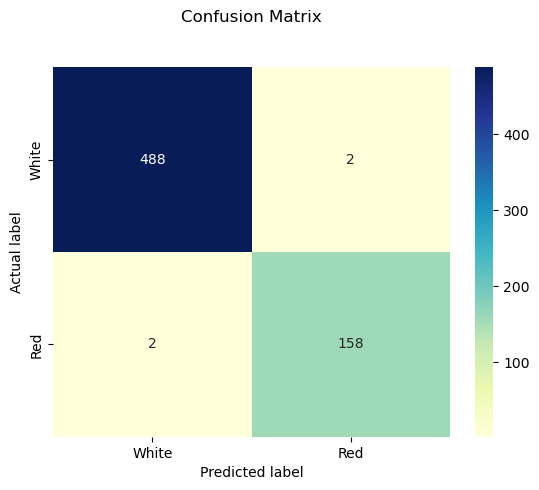

In [55]:
from sklearn.metrics import confusion_matrix

y_pred = np.round(best_model.predict(x_test))

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with custom labels
labels = ['White', 'Red']
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


##### From the confusion metrix above, we can see that there are four values being wrongly predicted